# Init and load

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp 
import json
from tqdm import tqdm
import random
%cd ..
from datasets.bases import read_image
from utils.metrics import *
from analyse import *
import umap
from matplotlib.patches import Patch


/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID


In [4]:
print("Loading data!")
output_dir = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/diagnosis2"
feature_type = "id0"#"tent2"
#distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
pids = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
camids = torch.load(osp.join(output_dir, f"camids_{feature_type}.pth"))
with open(osp.join(output_dir, f"imgpaths_{feature_type}.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 
#p = pids
#pids = distmat
#distmat = p
#p = camids
#camids = pids
#pids = p
qf, gf = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
#indices = np.argsort(distmat, axis=1)


# feature_type = "tent2"
# distmat2 = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
# qf2, gf2 = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
# indices2 = np.argsort(distmat2, axis=1)
print("Loaded successfully!")


from collections import Counter


qbins, gbins = {}, {}
qpids, gpids = {}, {}
for i in range(qf.shape[0]):
    if camids[i] in qbins: 
        qbins[camids[i]].append(qf[i].unsqueeze(0))
        qpids[camids[i]].append(pids[i])
    else: 
        qbins[camids[i]] = [qf[i].unsqueeze(0)]
        qpids[camids[i]] = [pids[i]]

for i in range(gf.shape[0]):
    if camids[qf.shape[0] + i] in gbins: 
        gbins[camids[qf.shape[0] + i]].append(gf[i].unsqueeze(0))
        gpids[camids[qf.shape[0] + i]].append(pids[qf.shape[0] + i])
    else: 
        gbins[camids[qf.shape[0] + i]] = [gf[i].unsqueeze(0)]
        gpids[camids[qf.shape[0] + i]] = [pids[qf.shape[0] + i]]

q_norms, g_norms = {}, {}
for k,v in qbins.items():
    q_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]
for k,v in gbins.items():
    g_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]

print(q_norms.keys(), g_norms.keys())

for k,v in q_norms.items():
    IDS = qpids[k]
    frequency_dict = Counter(IDS)
    frequency_dict = dict(frequency_dict)
    print(k, len(qbins[k]), frequency_dict)
    print(v[0])
    print(v[1])
    

Loading data!


/tmp/ipykernel_3094927/2763552676.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pids = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
/tmp/ipykernel_3094

Loaded successfully!
dict_keys([0]) dict_keys([3, 4, 5, 2, 1])
0 1882 {1223: 2, 1062: 1, 275: 2, 2: 4, 2663: 4, 1065: 2, 259: 2, 1823: 4, 2901: 4, 217: 2, 1280: 1, 2837: 2, 1432: 2, 69: 4, 313: 2, 1391: 3, 2127: 2, 2502: 2, 1032: 2, 1874: 2, 1038: 1, 474: 4, 468: 4, 1010: 1, 2174: 4, 2959: 2, 883: 2, 2803: 4, 305: 2, 306: 2, 2010: 1, 2512: 4, 2125: 2, 2066: 2, 2410: 2, 857: 2, 541: 4, 1338: 1, 472: 2, 1072: 2, 135: 2, 2167: 4, 467: 4, 2488: 1, 1333: 2, 1610: 1, 2664: 2, 2988: 1, 563: 1, 2217: 1, 148: 4, 2369: 6, 2185: 2, 2676: 2, 470: 2, 477: 4, 310: 1, 2470: 2, 128: 4, 1247: 2, 139: 2, 2586: 2, 2888: 2, 0: 2, 547: 4, 16: 2, 2018: 3, 2785: 3, 1348: 2, 2108: 4, 1822: 4, 559: 6, 1408: 4, 651: 2, 859: 1, 2133: 8, 2487: 2, 1108: 2, 1567: 2, 2632: 1, 2131: 2, 2068: 2, 2827: 2, 629: 3, 2620: 2, 2424: 2, 919: 2, 594: 2, 1287: 1, 2816: 2, 643: 2, 83: 4, 2938: 2, 2112: 4, 1817: 2, 548: 2, 733: 1, 1059: 2, 658: 3, 522: 2, 89: 2, 904: 2, 2824: 4, 1756: 2, 227: 2, 1757: 1, 234: 2, 124: 3, 2936: 4,

# Define TTA Class

In [3]:
# Test time adapter:

class TestTimeAdapter(nn.Module):
    def __init__(self, qnorms, gnorms, gallery_feats, gallery_camids, steps=1, device='cuda:1', lr=0.0005, topk=50, no_adapt=False):
        super(TestTimeAdapter, self).__init__()
        self.gallery_feats = gallery_feats
        self.gallery_camids = gallery_camids
        self.gnorms = gnorms
        self.qnorms = qnorms
        
        self.steps = steps
        self.lr = lr
        self.topk = topk
        self.reset()
        self.device = device
        self.no_adapt = no_adapt
        
        
    def loss(self, q, g):
        S = euclidean_distance(q, g, return_tensor=True)
        loss = 0.0
        for i in range(S.shape[0]):
            s = S[i]
            # Find the indices of the k smallest values
            _, topk_indices = torch.topk(s, self.topk, largest=False)
            # Create a mask with all False
            mask = torch.zeros_like(s, dtype=torch.bool)
            # Set True for top-k smallest indices
            mask[topk_indices] = True
            # Set all non-top-k elements to zero (or another value)
            s[~mask] = 0  # In-place operation
            loss += (s.sum()) / self.topk
        return loss / S.shape[0]
    
    def reset(self):
        self.param_list = []
        for k,v in self.gnorms.items():
            self.gnorms[k] = [torch.nn.Parameter(v[0]), torch.nn.Parameter(v[1])]
            #self.gnorms[k] = [v[0], v[1]]
            #self.qnorms[k] = [torch.nn.Parameter(qnorms[k][0]), torch.nn.Parameter(qnorms[k][1])]
            self.qnorms[k] = [self.qnorms[k][0], self.qnorms[k][1]]
            self.param_list.append(self.gnorms[k][0])
            self.param_list.append(self.gnorms[k][1])
            #self.param_list.append(self.qnorms[k][0])
            #self.param_list.append(self.qnorms[k][1])
        self.optimizer = torch.optim.Adam(params=self.param_list, lr=self.lr, weight_decay=1e-4)

    def forward(self, x, c, episodic=False):
        if episodic: self.reset()
        
        for _ in range(self.steps):
            x_norm, gf_norm = forward_and_adapt(self, x, c)
        

        return x_norm, gf_norm
    
@torch.enable_grad()  # ensure grads in possible no grad context for testing
def forward_and_adapt(adapter, x, c):
    #breakpoint()
    g = adapter.gallery_feats
    # Gallery normalization
    means, stds = [], []
    for i in adapter.gallery_camids:
        means.append(adapter.gnorms[i][0])
        stds.append(adapter.gnorms[i][1])
    means = torch.stack(means)
    stds = torch.stack(stds)
    gf_norm = (g - means.to(adapter.device)) / stds.to(adapter.device)

    # Query normalization
    means, stds = [], []
    for i in c:
        means.append(adapter.qnorms[i][0])
        stds.append(adapter.qnorms[i][1])
    means = torch.stack(means)
    stds = torch.stack(stds)
    #print(means.shape, stds.shape)
    x_norm = (x - means.to(adapter.device)) / stds.to(adapter.device)
    #print(x.shape, x_norm.shape, gf_norm.shape)
    if not adapter.no_adapt:
        loss = adapter.loss(x_norm, gf_norm)
        loss.backward()
        adapter.optimizer.step()
        adapter.optimizer.zero_grad()

    return x_norm, gf_norm

    


# Test

In [4]:
def test_grid(steps, lr, topk, qnorms, gnorms, batchsize=32, pids=pids, camids=camids, qf=qf, gf=gf, norm_eval=False, episodic=False):
    # print("before adaptation")
    # query_feats, gallery_feats = qf, gf
    # PIDS, CIDS = pids, camids
    # #print(qf.shape, gf.shape, indices.shape)
    # evaluator = R1_mAP_eval(num_query=query_feats.shape[0], max_rank=50, feat_norm=True)
    # feats = torch.cat([query_feats, gallery_feats], dim=0)
    # evaluator.feats = feats
    # evaluator.pids = PIDS
    # evaluator.camids = CIDS
    # cmc, mAP, _, _, _, _, _ = evaluator.compute()
    # print(mAP)
    # print(cmc[0], cmc[4], cmc[9], cmc[49])
    if norm_eval:
        print("normalized:")
        QF, GF = [], []
        for i in range(qf.shape[0]):
            QF.append((qf[i] - qnorms[camids[i]][0]) / qnorms[camids[i]][1])
        for i in range(gf.shape[0]):
            GF.append((gf[i] - gnorms[camids[qf.shape[0] + i]][0]) / gnorms[camids[qf.shape[0] + i]][1])
        query_feats, gallery_feats = torch.stack(QF), torch.stack(GF)
        PIDS, CIDS = pids, camids
        #print(qf.shape, gf.shape, indices.shape)
        evaluator = R1_mAP_eval(num_query=query_feats.shape[0], max_rank=50, feat_norm=True)
        feats = torch.cat([query_feats, gallery_feats], dim=0)
        evaluator.feats = feats
        evaluator.pids = PIDS
        evaluator.camids = CIDS
        cmc, mAP, _, _, _, _, _ = evaluator.compute()
        print(mAP)
        print(cmc[0], cmc[4], cmc[9], cmc[49])


    print("adapting now")
    adapter = TestTimeAdapter(qnorms=qnorms, gnorms=gnorms, gallery_feats=gf.to('cuda:1'), gallery_camids=camids[qf.shape[0]:], steps=steps, lr=lr, topk=topk).to('cuda:1').train()

    qf_new = []
    batchsize = 32
    total_batches = qf.shape[0] // batchsize
    for i in tqdm(range(total_batches + 1)):
        if batchsize * i == qf.shape[0]: break
        q = qf[batchsize * i:(i+1)*batchsize].to('cuda:1')
        c = camids[:qf.shape[0]][batchsize * i:(i+1)*batchsize]
        q, g = adapter(q, c, episodic=episodic)
        #print(q.shape, g.shape)
        qf_new.append(q.detach().cpu())
        gf_new = g.detach().cpu()
    qf_new = torch.cat(qf_new, dim=0)
    #print(qf_new.shape)
    # fetch from bins

    query_feats, gallery_feats = qf_new, gf_new
    PIDS, CIDS = pids, camids
    #print(qf.shape, gf.shape, indices.shape)
    evaluator = R1_mAP_eval(num_query=query_feats.shape[0], max_rank=50, feat_norm=True)
    feats = torch.cat([query_feats, gallery_feats], dim=0)
    evaluator.feats = feats
    evaluator.pids = PIDS
    evaluator.camids = CIDS
    cmc, mAP, _, _, _, _, _ = evaluator.compute()
    print(mAP)
    print(cmc[0], cmc[4], cmc[9], cmc[49])
    return query_feats, gallery_feats, PIDS, CIDS

In [5]:
qfn, gfn, pidsn, camidsn = test_grid(1, 0.0005, 5, qnorms=q_norms, gnorms=g_norms, episodic=True)

qnbins, gnbins = {}, {}
qnpids, gnpids = {}, {}
for i in range(qfn.shape[0]):
    if camidsn[i] in qnbins: 
        qnbins[camidsn[i]].append(qfn[i].unsqueeze(0))
        qnpids[camidsn[i]].append(pidsn[i])
    else: 
        qnbins[camidsn[i]] = [qfn[i].unsqueeze(0)]
        qnpids[camidsn[i]] = [pidsn[i]]

for i in range(gfn.shape[0]):
    if camidsn[qfn.shape[0] + i] in gnbins: 
        gnbins[camidsn[qfn.shape[0] + i]].append(gfn[i].unsqueeze(0))
        gnpids[camidsn[qfn.shape[0] + i]].append(pidsn[qfn.shape[0] + i])
    else: 
        gnbins[camidsn[qfn.shape[0] + i]] = [gfn[i].unsqueeze(0)]
        gnpids[camidsn[qfn.shape[0] + i]] = [pidsn[qfn.shape[0] + i]]

# qnnorms, gnnorms = {}, {}
# for k,v in qnbins.items():
#     qnnorms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]
# for k,v in gnbins.items():
#     gnnorms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]

# print(qnnorms.keys(), gnnorms.keys())

# for k,v in qnnorms.items():
#     IDS = qnpids[k]
#     frequency_dict = Counter(IDS)
#     frequency_dict = dict(frequency_dict)
#     print(k, len(qnbins[k]), frequency_dict)
#     print(v[0])
#     print(v[1])

adapting now


  0%|          | 0/365 [00:00<?, ?it/s]/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/utils/metrics.py:16: UserWarning: This overload of addmm_ is deprecated:
	addmm_(Number beta, Number alpha, Tensor mat1, Tensor mat2)
Consider using one of the following signatures instead:
	addmm_(Tensor mat1, Tensor mat2, *, Number beta = 1, Number alpha = 1) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1581.)
  dist_mat.addmm_(1, -2, qf, gf.t())
  6%|▌         | 22/365 [00:38<09:59,  1.75s/it]


KeyboardInterrupt: 

In [43]:
print(qf.shape[0])
print(pids[qf.shape[0]:])
print(camids[qf.shape[0]:])

294
[2591, 723, 376, 710, 1785, 849, 2258, 411, 3045, 1687, 2485, 631, 2639, 1223, 2316, 102, 795, 1654, 661, 1813, 1885, 2629, 59, 1926, 690, 2831, 1595, 2024, 87, 2589, 1290, 2010, 2710, 702, 1627, 1805, 2790, 850, 1340, 2528, 2103, 1955, 1700, 2818, 558, 127, 2645, 2784, 554, 1855, 1779, 2022, 2600, 2022, 895, 1894, 2730, 1148, 621, 749, 1346, 19, 129, 662, 1651, 890, 621, 1534, 2909, 2190, 2130, 1813, 524, 1845, 2089, 191, 1151, 1376, 754, 1952, 961, 2621, 2269, 1855, 2982, 66, 778, 946, 411, 2088, 2163, 2083, 444, 2825, 1603, 1537, 1688, 2266, 2273, 461, 163, 2816, 1186, 2427, 1038, 2266, 3014, 700, 1413, 662, 2871, 1947, 1371, 494, 2334, 141, 1561, 842, 2898, 1943, 54, 1984, 2833, 1197, 1381, 1448, 1059, 2718, 1730, 2909, 2720, 2978, 796, 2792, 467, 2343, 2969, 2891, 2028, 1097, 211, 2066, 794, 1148, 3048, 3028, 569, 1787, 1871, 2053, 506, 1926, 2320, 2412, 1603, 2550, 796, 568, 1244, 2587, 470, 914, 1817, 110, 2302, 2063, 754, 1137, 2832, 780, 1203, 422, 264, 1540, 2429, 2200, 2

In [29]:
print("Loading data!")
output_dir = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/diagnosis2"
feature_type = "id2"#"tent2"
#distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
pids = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
camids = torch.load(osp.join(output_dir, f"camids_{feature_type}.pth"))
with open(osp.join(output_dir, f"imgpaths_{feature_type}.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 
#p = pids
#pids = distmat
#distmat = p
#p = camids
#camids = pids
#pids = p
qf, gf = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
#indices = np.argsort(distmat, axis=1)


# feature_type = "tent2"
# distmat2 = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
# qf2, gf2 = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
# indices2 = np.argsort(distmat2, axis=1)
print("Loaded successfully!")

Loading data!
Loaded successfully!


/tmp/ipykernel_1741152/2766777839.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pids = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
/tmp/ipykernel_1741

In [30]:
#sample_pids = [768, 422, 96, 155, 471, 727]

sample_pids = np.intersect1d(np.unique(pids[:qf.shape[0]]), np.unique(pids[qf.shape[0]:])) #[275, 2, 2663, 1032, 474, 306, 2010, 2512, 2125, 2066]

query_space, gallery_space, qpid_space, gpid_space, qcid_space, gcid_space = [], [], [], [], [], []

for i in range(qf.shape[0]):
    if pids[i] in sample_pids:
        query_space.append(qf[i].detach().cpu().numpy())
        qpid_space.append(pids[i])
        qcid_space.append(camids[i])
for i in range(gf.shape[0]):
    if pids[qf.shape[0] + i] in sample_pids:
        gallery_space.append(gf[i].detach().cpu().numpy())
        gpid_space.append(pids[qf.shape[0] + i])
        gcid_space.append(camids[qf.shape[0] + i])

query_space, gallery_space = np.array(query_space), np.array(gallery_space)
qpid_space, gpid_space = np.array(qpid_space), np.array(gpid_space)
qcid_space, gcid_space = np.array(qcid_space), np.array(gcid_space)

# for i in range(qfn.shape[0]):
#     if pidsn[i] in sample_pids:
#         query_space.append(qfn[i])
#         qpid_space.append(pidsn[i])
#         qcid_space.append(camidsn[i])
# for i in range(gfn.shape[0]):    
#     if pidsn[qfn.shape[0] + i] in sample_pids:
#         gallery_space.append(gfn[i])
#         gpid_space.append(pidsn[qfn.shape[0] + i])
#         gcid_space.append(camidsn[qfn.shape[0] + i])


In [23]:
#print(camids[:qf.shape[0]])
print(qf.shape, qfn.shape)

torch.Size([1246, 1280]) torch.Size([294, 1280])


/tmp/ipykernel_1741152/51853019.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=unique_camera_ids)


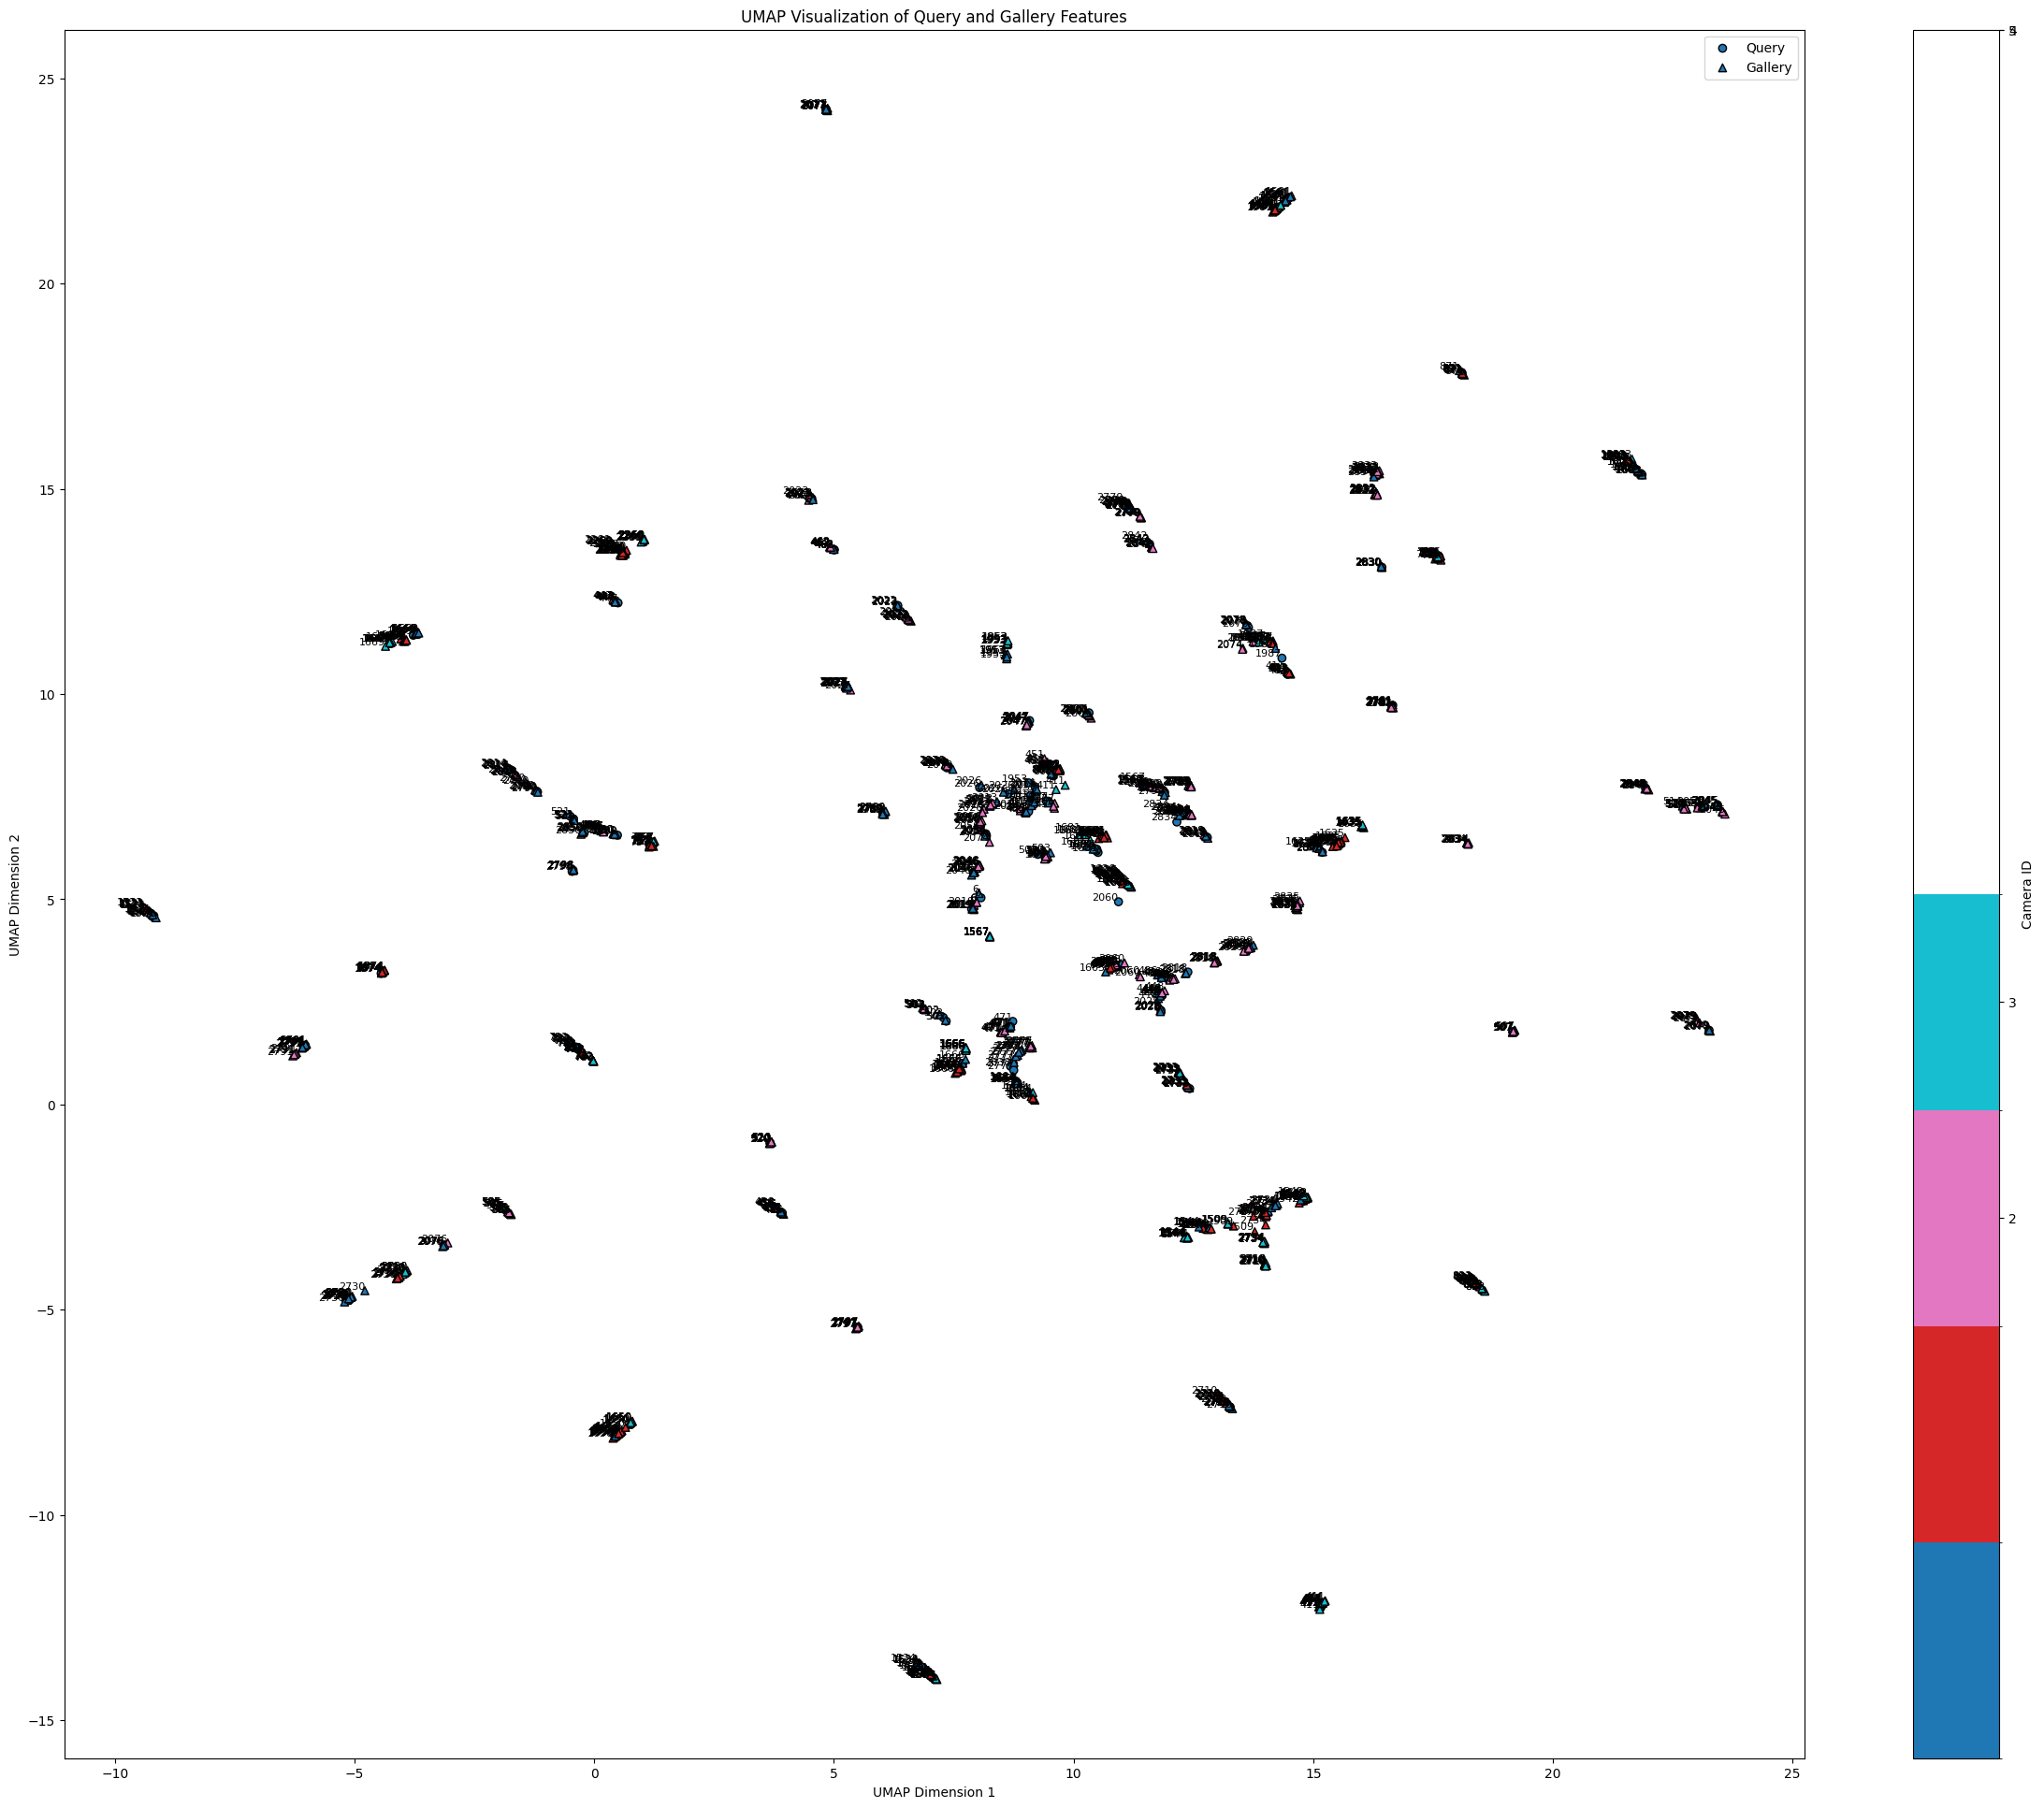

In [31]:
import matplotlib.colors as mcolors

# Enable interactive mode in a separate window
#%matplotlib qt 
# Ensure features and associated metadata are PyTorch tensors
# Assuming query_space, gallery_space, qpid_space, gpid_space, qcid_space, gcid_space are PyTorch tensors

# Convert PyTorch tensors to NumPy arrays for UMAP compatibility
query_space_np = query_space # Convert query features
gallery_space_np = gallery_space # Convert gallery features

# Convert camera IDs and person IDs to NumPy
qpid_space_np = qpid_space
gpid_space_np = gpid_space
qcid_space_np = qcid_space
gcid_space_np = gcid_space

# Combine query and gallery features
combined_features = np.concatenate((query_space_np, gallery_space_np), axis=0)

# Apply UMAP to reduce to 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embeddings = umap_model.fit_transform(combined_features)

# Separate UMAP embeddings for query and gallery
query_umap = umap_embeddings[:len(query_space_np)]
gallery_umap = umap_embeddings[len(query_space_np):]

# Unique Camera IDs
unique_camera_ids = np.unique(np.concatenate((qcid_space_np, gcid_space_np)))

# Define a discrete color map
cmap = plt.get_cmap('tab10', len(unique_camera_ids))  # Use a qualitative colormap
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(unique_camera_ids) + 1) - 0.5, 
                            ncolors=len(unique_camera_ids))

# Create a scatter plot
plt.figure(figsize=(30, 24))

# Scatter plot for query points (dot markers)
scatter_query = plt.scatter(query_umap[:, 0], query_umap[:, 1], 
                            c=qcid_space_np, cmap=cmap, label='Query', 
                            marker='o', edgecolor='k')

# Scatter plot for gallery points (triangle markers)
scatter_gallery = plt.scatter(gallery_umap[:, 0], gallery_umap[:, 1], 
                              c=gcid_space_np, cmap=cmap, label='Gallery', 
                              marker='^', edgecolor='k')

# Add text labels for person IDs (adjust font size)
for i, pid in enumerate(qpid_space_np):
    plt.text(query_umap[i, 0], query_umap[i, 1], str(pid), fontsize=8, ha='right', va='bottom')

for i, pid in enumerate(gpid_space_np):
    plt.text(gallery_umap[i, 0], gallery_umap[i, 1], str(pid), fontsize=8, ha='right', va='bottom')

# Create a discrete colorbar for Camera IDs
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
cbar = plt.colorbar(sm, ticks=unique_camera_ids)
cbar.set_label('Camera ID')
cbar.set_ticks(unique_camera_ids)
cbar.set_ticklabels(unique_camera_ids)
# Title and labels
plt.title("UMAP Visualization of Query and Gallery Features")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Show legend
plt.legend()

# Show the plot
plt.show(block=True)


In [33]:
print("Loading data!")
output_dir = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/diagnosis"
feature_type = "id2"#"tent2"
#distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
pidsn = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
camidsn = torch.load(osp.join(output_dir, f"camids_{feature_type}.pth"))
with open(osp.join(output_dir, f"imgpaths_{feature_type}.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 
#p = pids
#pids = distmat
#distmat = p
#p = camids
#camids = pids
#pids = p
qfn, gfn = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
#indices = np.argsort(distmat, axis=1)


# feature_type = "tent2"
# distmat2 = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
# qf2, gf2 = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
# indices2 = np.argsort(distmat2, axis=1)
ncams, nfeats, npids = [], [], []
for idx in range(qfn.shape[0]):
    if camidsn[idx] == 2:
        ncams.append(camidsn[idx])
        npids.append(pidsn[idx])
        nfeats.append(qfn[idx].unsqueeze(0))

qfn = torch.cat(nfeats, dim=0)
camidsn = np.concatenate((np.array(ncams), camidsn[qfn.shape[0]:]))

pidsn = np.concatenate((np.array(npids), np.array(pidsn[qfn.shape[0]:])))

print("Loaded successfully!")

Loading data!
Loaded successfully!


/tmp/ipykernel_1741152/1116492812.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pidsn = torch.load(osp.join(output_dir, f"pids_{feature_type}.pth"))
/tmp/ipykernel_174

In [34]:
#sample_pids = [768, 422, 96, 155, 471, 727]

#sample_pids = np.concatenate((np.intersect1d(np.unique(pidsn[:qf.shape[0]]), np.unique(pidsn[qf.shape[0]:])), np.random.choice(np.unique(pidsn[qf.shape[0]:]), 10, replace=False))) #[275, 2, 2663, 1032, 474, 306, 2010, 2512, 2125, 2066]

sample_pids = np.intersect1d(np.unique(pids[:qf.shape[0]]), np.unique(pids[qf.shape[0]:]))

query_space, gallery_space, qpid_space, gpid_space, qcid_space, gcid_space = [], [], [], [], [], []


for i in range(qfn.shape[0]):
    if pidsn[i] in sample_pids:
        query_space.append(qfn[i].detach().cpu().numpy())
        qpid_space.append(pidsn[i])
        qcid_space.append(camidsn[i])
for i in range(gfn.shape[0]):    
    if pidsn[qfn.shape[0] + i] in sample_pids:
        gallery_space.append(gfn[i].detach().cpu().numpy())
        gpid_space.append(pidsn[qfn.shape[0] + i])
        gcid_space.append(camidsn[qfn.shape[0] + i])

query_space, gallery_space = np.array(query_space), np.array(gallery_space)
qpid_space, gpid_space = np.array(qpid_space), np.array(gpid_space)
qcid_space, gcid_space = np.array(qcid_space), np.array(gcid_space)



/tmp/ipykernel_1741152/1251094621.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=unique_camera_ids)


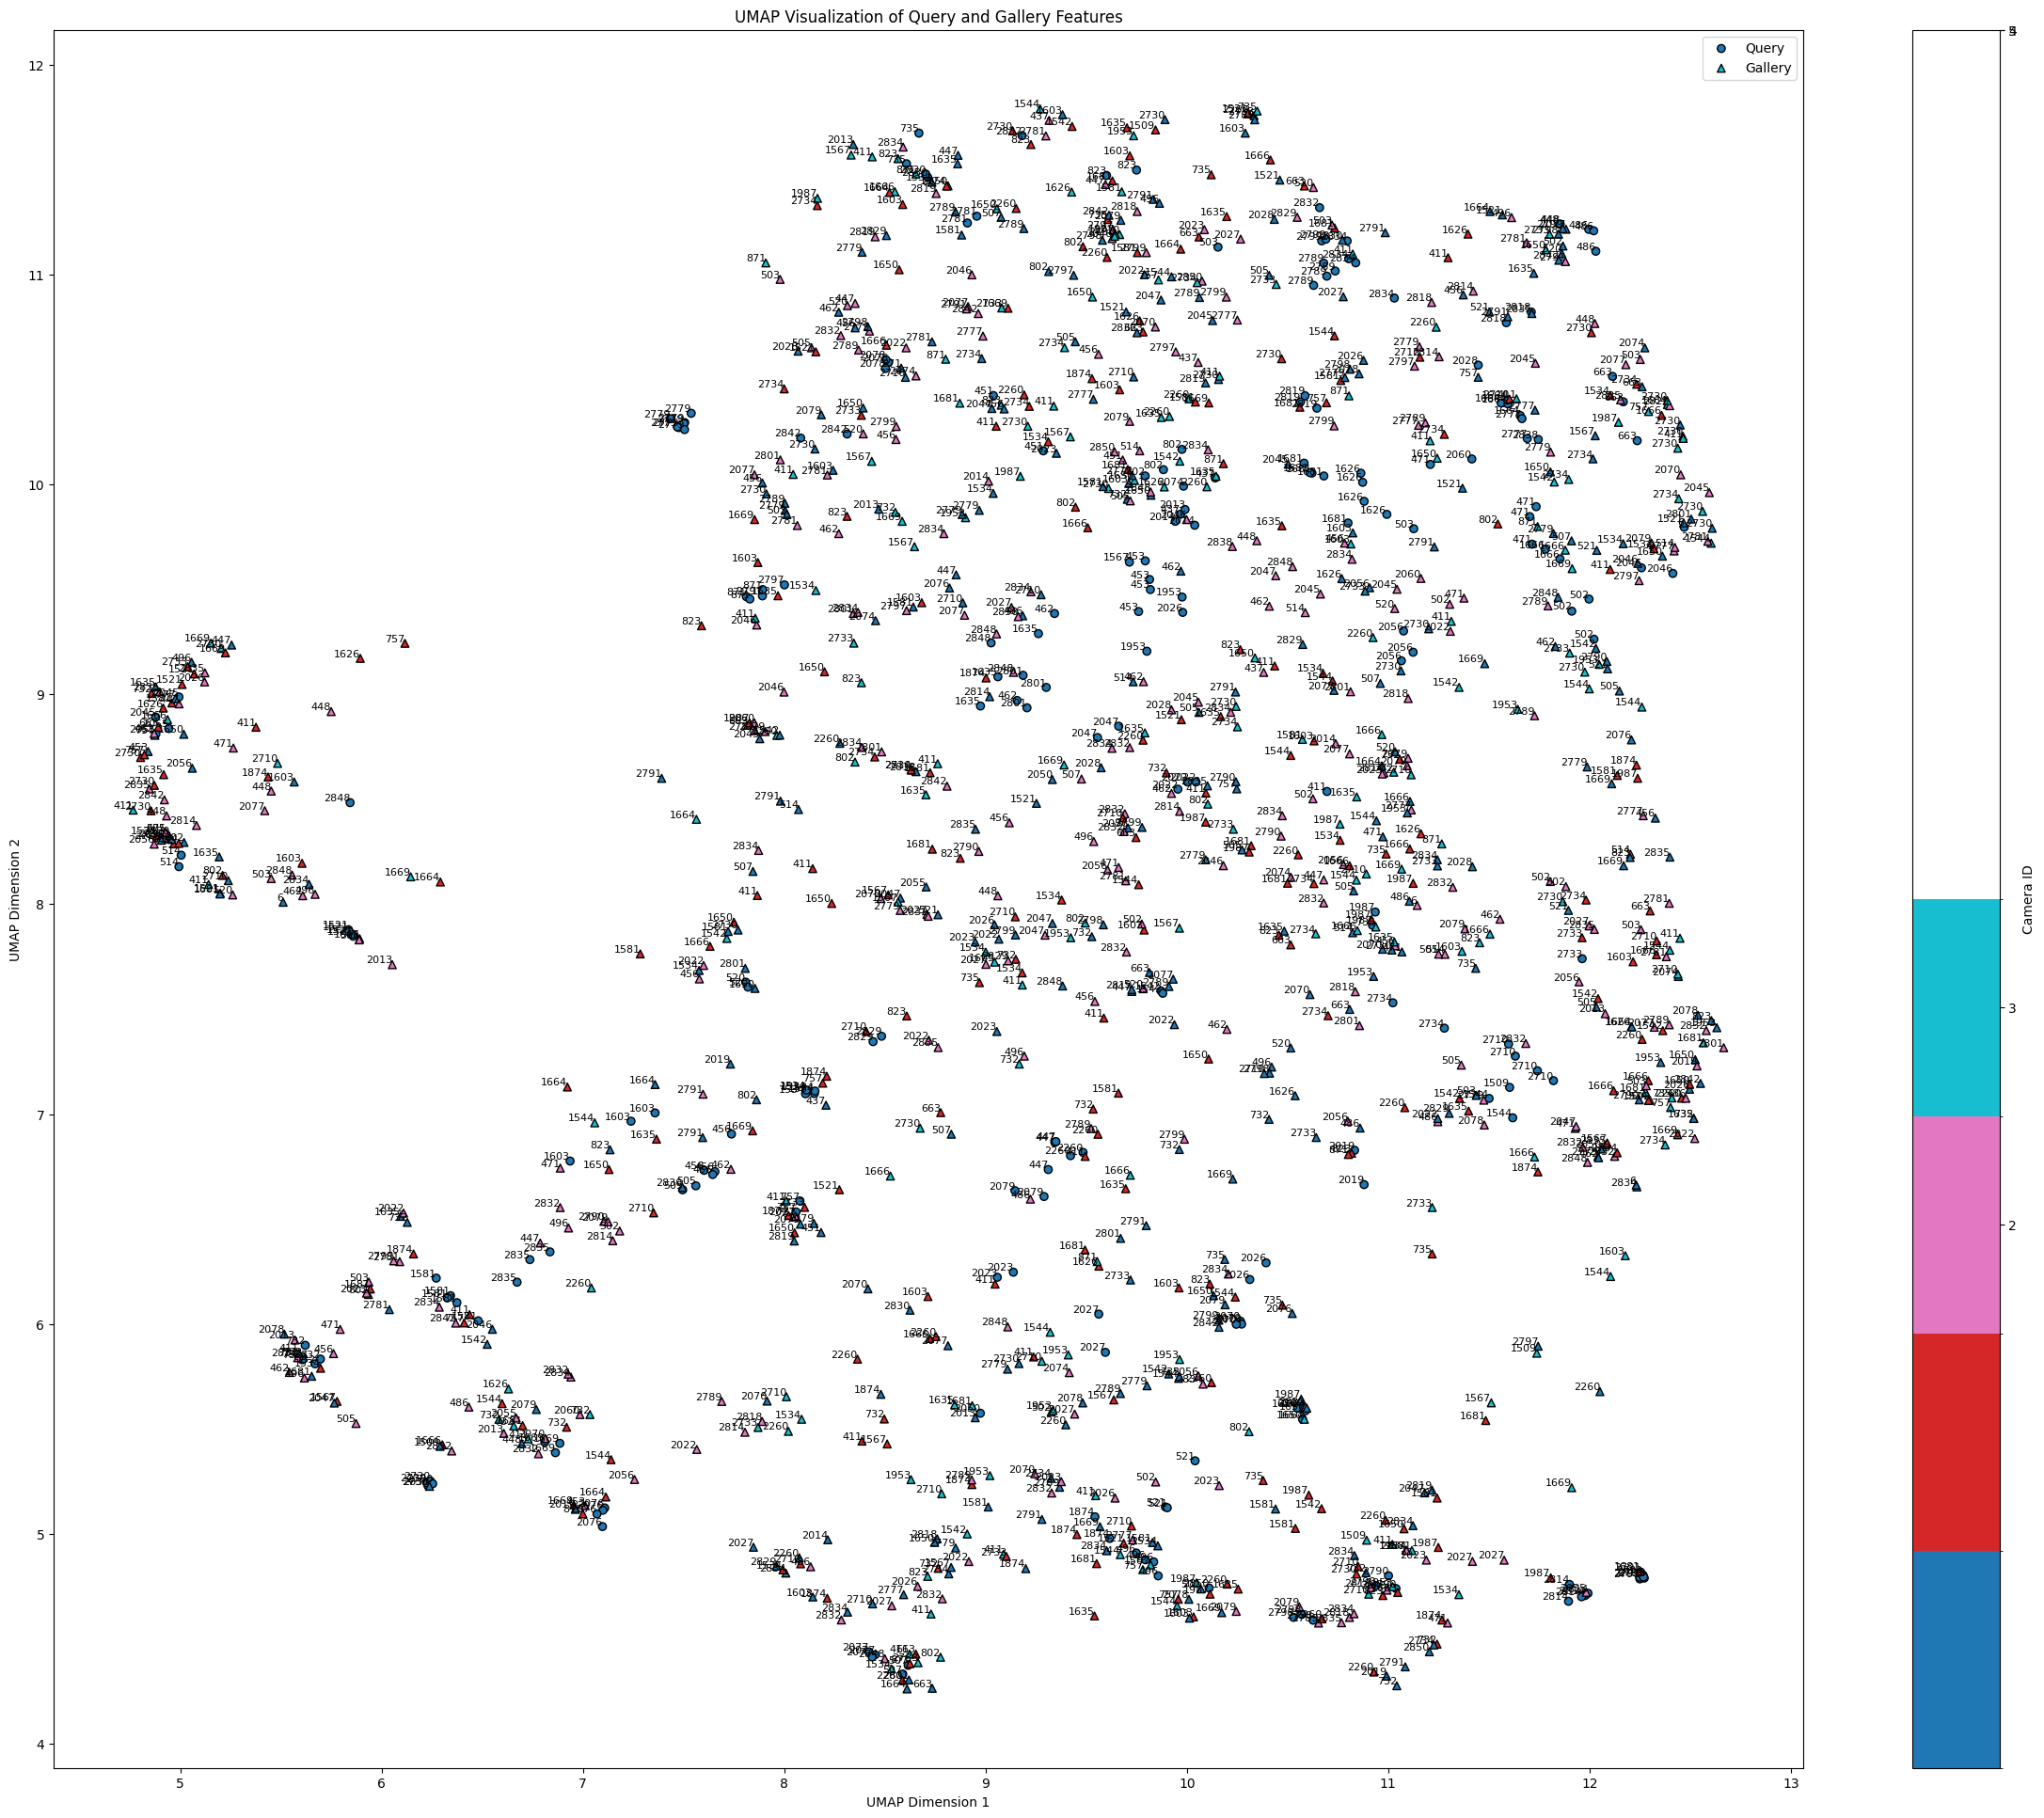

In [35]:
import matplotlib.colors as mcolors

# Enable interactive mode in a separate window
#%matplotlib qt 
# Ensure features and associated metadata are PyTorch tensors
# Assuming query_space, gallery_space, qpid_space, gpid_space, qcid_space, gcid_space are PyTorch tensors

# Convert PyTorch tensors to NumPy arrays for UMAP compatibility
query_space_np = query_space # Convert query features
gallery_space_np = gallery_space # Convert gallery features

# Convert camera IDs and person IDs to NumPy
qpid_space_np = qpid_space
gpid_space_np = gpid_space
qcid_space_np = qcid_space
gcid_space_np = gcid_space

# Combine query and gallery features
combined_features = np.concatenate((query_space_np, gallery_space_np), axis=0)

# Apply UMAP to reduce to 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embeddings = umap_model.fit_transform(combined_features)

# Separate UMAP embeddings for query and gallery
query_umap = umap_embeddings[:len(query_space_np)]
gallery_umap = umap_embeddings[len(query_space_np):]

# Unique Camera IDs
unique_camera_ids = np.unique(np.concatenate((qcid_space_np, gcid_space_np)))

# Define a discrete color map
cmap = plt.get_cmap('tab10', len(unique_camera_ids))  # Use a qualitative colormap
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(unique_camera_ids) + 1) - 0.5, 
                            ncolors=len(unique_camera_ids))

# Create a scatter plot
plt.figure(figsize=(30, 24))

# Scatter plot for query points (dot markers)
scatter_query = plt.scatter(query_umap[:, 0], query_umap[:, 1], 
                            c=qcid_space_np, cmap=cmap, label='Query', 
                            marker='o', edgecolor='k')

# Scatter plot for gallery points (triangle markers)
scatter_gallery = plt.scatter(gallery_umap[:, 0], gallery_umap[:, 1], 
                              c=gcid_space_np, cmap=cmap, label='Gallery', 
                              marker='^', edgecolor='k')

# Add text labels for person IDs (adjust font size)
for i, pid in enumerate(qpid_space_np):
    plt.text(query_umap[i, 0], query_umap[i, 1], str(pid), fontsize=8, ha='right', va='bottom')

for i, pid in enumerate(gpid_space_np):
    plt.text(gallery_umap[i, 0], gallery_umap[i, 1], str(pid), fontsize=8, ha='right', va='bottom')

# Create a discrete colorbar for Camera IDs
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
cbar = plt.colorbar(sm, ticks=unique_camera_ids)
cbar.set_label('Camera ID')
cbar.set_ticks(unique_camera_ids)
cbar.set_ticklabels(unique_camera_ids)
# Title and labels
plt.title("UMAP Visualization of Query and Gallery Features")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Title and labels
plt.title("UMAP Visualization of Query and Gallery Features")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

# Show legend
plt.legend()

# Show the plot
plt.show(block=True)


In [63]:
np.unique(camids[:qfn.shape[0]])

array([1, 2, 3, 4, 5, 9])

# Trash

In [16]:
print(len(query_space), len(gallery_space))
print(qpid_space)
print(qcid_space)
print(gpid_space)
print(gcid_space)


28 164
[ 96  96  96  96  96 155 155 155 155 155 155 422 422 422 422 422 471 471
 471 471 727 727 727 727 727 768 768 768]
[0 1 2 4 5 0 1 2 3 4 5 0 1 2 3 4 0 1 2 4 0 2 3 4 5 1 2 5]
[ 96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96  96
  96  96  96  96  96 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155 422 422 422 422 422 422 422 422 422 422 422 422 422 422
 422 422 471 471 471 471 471 471 471 471 471 471 471 727 727 727 727 727
 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727
 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727 727
 727 727 727 727 727 727 727 727 727 727 727 727 727 768 768 768 768 768
 768 768]
[0 0 0 0 1 1 1 1 1 1 1 2 2 4 4 4 5 5 5 5 5 5 5 0 0 0 0 1 1 2 2 2 2 2 2 2 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 

/export/livia/home/vision/Rbhattacharya/anaconda3/envs/clipreid/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


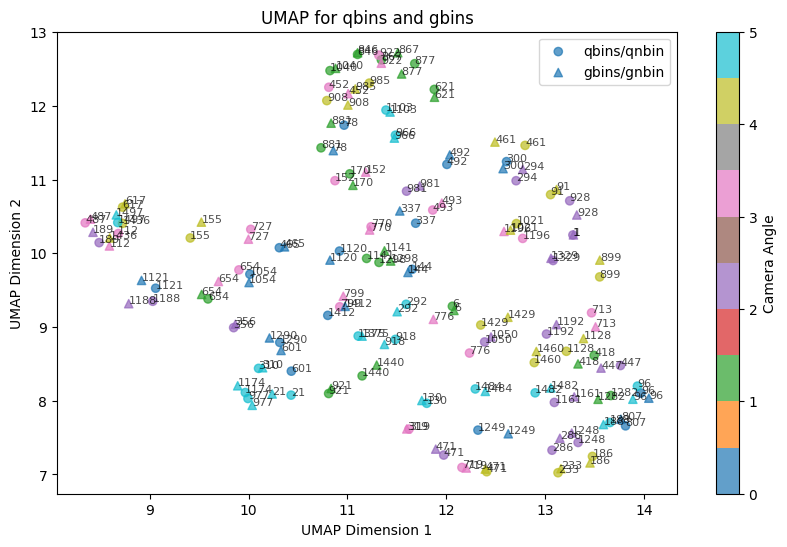

/export/livia/home/vision/Rbhattacharya/anaconda3/envs/clipreid/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


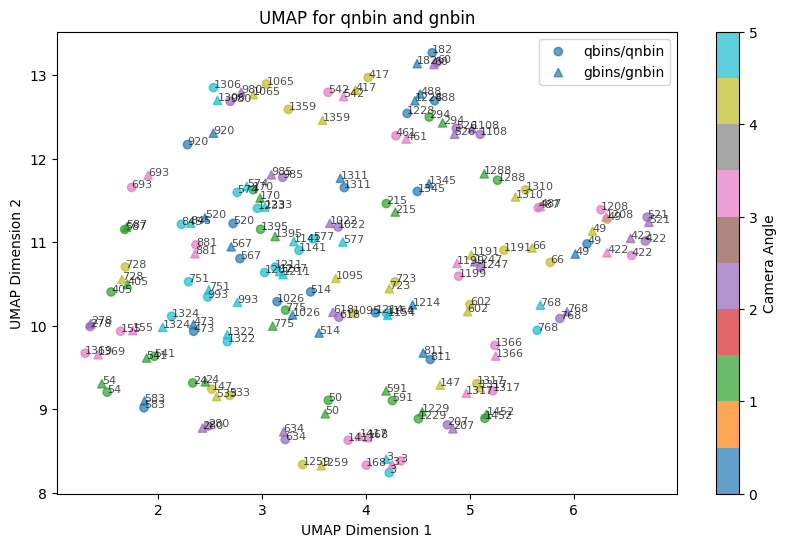

In [41]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import random

def sample_data(bins1, bins2, pids1, pids2, num_samples=15):
    sampled_data1 = {}
    sampled_data2 = {}
    sampled_pids = {}
    for angle, vectors in bins1.items():
        valid_indices = [i for i, pid in enumerate(pids1[angle]) if pid in pids2[angle]]
        sampled_indices = random.sample(valid_indices, num_samples)
        sampled_data1[angle] = [vectors[i] for i in sampled_indices]
        sampled_pids[angle] = [pids1[angle][i] for i in sampled_indices]
        sampled_data2[angle] = [bins2[angle][pids2[angle].index(pids1[angle][i])] for i in sampled_indices]
    return sampled_data1, sampled_data2, sampled_pids

def extract_features(sampled_data, sampled_pids):
    features, labels, ids = [], [], []
    for angle, vectors in sampled_data.items():
        features.extend(vectors)
        labels.extend([angle] * len(vectors))
        ids.extend(sampled_pids[angle])
    return torch.vstack(features).numpy(), np.array(labels), ids

def plot_umap_combined(features1, labels1, ids1, features2, labels2, ids2, title):
    reducer = umap.UMAP(n_components=2, random_state=42)
    combined_features = np.vstack((features1, features2))
    embedding = reducer.fit_transform(combined_features)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(embedding[:len(features1), 0], embedding[:len(features1), 1], c=labels1, cmap='tab10', marker='o', alpha=0.7, label='qbins/qnbin')
    plt.scatter(embedding[len(features1):, 0], embedding[len(features1):, 1], c=labels2, cmap='tab10', marker='^', alpha=0.7, label='gbins/gnbin')
    plt.colorbar(label="Camera Angle")
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    
    # Annotate points with their IDs
    for i, txt in enumerate(ids1):
        plt.annotate(txt, (embedding[i, 0], embedding[i, 1]), fontsize=8, alpha=0.7)
    for i, txt in enumerate(ids2):
        plt.annotate(txt, (embedding[len(features1) + i, 0], embedding[len(features1) + i, 1]), fontsize=8, alpha=0.7)
    
    plt.show()

# Sample from qbins and gbins ensuring matching IDs
qbins_sampled, gbins_sampled, qpids_sampled = sample_data(qbins, gbins, qpids, gpids)

# Extract features and labels
q_features, q_labels, q_ids = extract_features(qbins_sampled, qpids_sampled)
g_features, g_labels, g_ids = extract_features(gbins_sampled, qpids_sampled)

# Plot UMAP for qbins and gbins together
plot_umap_combined(q_features, q_labels, q_ids, g_features, g_labels, g_ids, "UMAP for qbins and gbins")

# Sample from qnbin and gnbin ensuring matching IDs
qnbin_sampled, gnbin_sampled, qnpids_sampled = sample_data(qnbins, gnbins, qnpids, gnpids)

# Extract features and labels
qnbin_features, qnbin_labels, qnbin_ids = extract_features(qnbin_sampled, qnpids_sampled)
gnbin_features, gnbin_labels, gnbin_ids = extract_features(gnbin_sampled, qnpids_sampled)

# Plot UMAP for qnbin and gnbin together
plot_umap_combined(qnbin_features, qnbin_labels, qnbin_ids, gnbin_features, gnbin_labels, gnbin_ids, "UMAP for qnbin and gnbin")


In [35]:
print(q_ids, g_ids, qnbin_ids, gnbin_ids)

[789, 447, 1287, 1322, 521, 807, 465, 1199, 262, 39, 365, 783, 283, 231, 163, 183, 1073, 83, 799, 355, 1268, 124, 1355, 312, 229, 880, 229, 1324, 274, 591] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 91, 0, 0, 0, 0, 16, 0, 0] [789, 447, 1287, 1322, 521, 807, 465, 1199, 262, 39, 365, 783, 283, 231, 163, 183, 1073, 83, 799, 355, 1268, 124, 1355, 312, 229, 880, 229, 1324, 274, 591] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 91, 0, 0, 0, 0, 16, 0, 0]


In [13]:
S = [1]#, 2, 5]
L = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01]
T = [1] #, 5, 10, 50, 100]#[1, 2, 3, 5, 10, 20, 30, 50, 100, 200]

for s in S:
    for l in L:
        for t in T:
            print("================================================================================")
            print(f"Steps: {s}, LR: {l}, Topk: {t}")
            test_grid(steps=s, lr=l, topk=t)
            print("================================================================================")
            

Steps: 1, LR: 1e-05, Topk: 1


  0%|          | 0/106 [00:00<?, ?it/s]

100%|██████████| 106/106 [00:36<00:00,  2.90it/s]


The test feature is normalized
=> Computing DistMat with euclidean_distance


100%|██████████| 3368/3368 [00:01<00:00, 3071.75it/s]


0.5289295480403521
0.7621734 0.8847981 0.9216152 0.9801069
Steps: 1, LR: 0.0001, Topk: 1


100%|██████████| 106/106 [00:32<00:00,  3.29it/s]


The test feature is normalized
=> Computing DistMat with euclidean_distance


100%|██████████| 3368/3368 [00:01<00:00, 3004.88it/s]


0.5293703199693045
0.7651425 0.885095 0.9263658 0.98070073
Steps: 1, LR: 0.0005, Topk: 1


100%|██████████| 106/106 [00:26<00:00,  3.97it/s]


The test feature is normalized
=> Computing DistMat with euclidean_distance


100%|██████████| 3368/3368 [00:01<00:00, 3107.05it/s]


0.5296379788019806
0.76573634 0.8865796 0.92695963 0.98070073
Steps: 1, LR: 0.001, Topk: 1


100%|██████████| 106/106 [00:26<00:00,  3.95it/s]


The test feature is normalized
=> Computing DistMat with euclidean_distance


100%|██████████| 3368/3368 [00:01<00:00, 3116.28it/s]


0.5296656455226487
0.76425177 0.8847981 0.9263658 0.9809976
Steps: 1, LR: 0.005, Topk: 1


100%|██████████| 106/106 [00:26<00:00,  3.99it/s]


The test feature is normalized
=> Computing DistMat with euclidean_distance


100%|██████████| 3368/3368 [00:01<00:00, 3147.59it/s]


0.5284213373964554
0.7624703 0.8862827 0.9275534 0.9809976
Steps: 1, LR: 0.01, Topk: 1


 25%|██▍       | 26/106 [00:06<00:20,  3.96it/s]


KeyboardInterrupt: 